In [121]:
import numpy as np
import pandas as pd



In [122]:
df=pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")

In [123]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
397,ham,You are always putting your business out there...,NaN,NaN,NaN
778,ham,Happy New year my dear brother. I really do mi...,NaN,NaN,NaN
2239,ham,Every day i use to sleep after &lt;#&gt; so ...,NaN,NaN,NaN
2690,spam,sports fans - get the latest sports news str* ...,NaN,NaN,NaN
3347,ham,"Sorry, I'll call later",NaN,NaN,NaN


In [124]:
df.shape

(5572, 5)

1.**DATA CLEANING**

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [126]:
#dropping last 3 columns as most of the values are null.
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,errors='ignore',inplace=True)

In [127]:
df.sample(5)

,v1,v2
1545,ham,"Good afternoon, my love ! Any job prospects ? ..."
2337,ham,Tell your friends what you plan to do on Valen...
3818,ham,"sorry brah, just finished the last of my exams..."
5504,ham,Wait . I will msg after &lt;#&gt; min.
1059,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...


In [128]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3211,ham,We got a divorce. Lol. She.s here
5212,ham,K.k.how is your business now?
3175,ham,Havent still waitin as usual... ÌÏ come back s...
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...
3275,ham,Lol your right. What diet? Everyday I cheat an...


In [129]:
#encoding categorical values:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [130]:
df['target']=encoder.fit_transform(df['target'])

In [131]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
#checking missing values:
df.isnull().sum()

,0
target,0
text,0


In [133]:
#checking for duplicate values:
df.duplicated().sum()

np.int64(403)

In [134]:
#remove duplicate values:
df=df.drop_duplicates(keep='first')

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
df.shape

(5169, 2)

**2.Exploratory Data Analysis:**

In [137]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [138]:

df['target'].value_counts()

,count
target,
0,4516
1,653


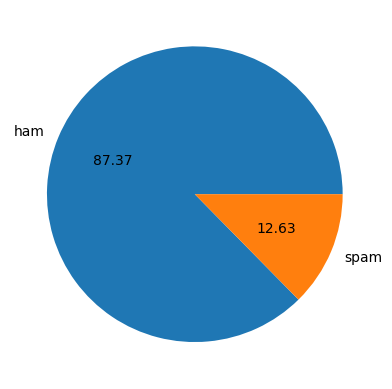

In [139]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [140]:
#Data is imbalanced.

In [141]:
#For deeper analysis three new columns should be added(num_characters,num_words,num_sentences).

In [142]:
!pip install nltk

In [143]:
import nltk #natural language toolkit library

In [144]:
nltk.download('punkt_tab') #dependencies for nltk to perform it's work.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [145]:
#counting number of characters in a msg.
df['num_characters']=df['text'].apply(len)

In [146]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [147]:
#counting number of words in msg.
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [148]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [149]:
#counting number of sentences in msg.
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [151]:
#Descibing spam and ham msgs differently to know the differences:

In [152]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [154]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

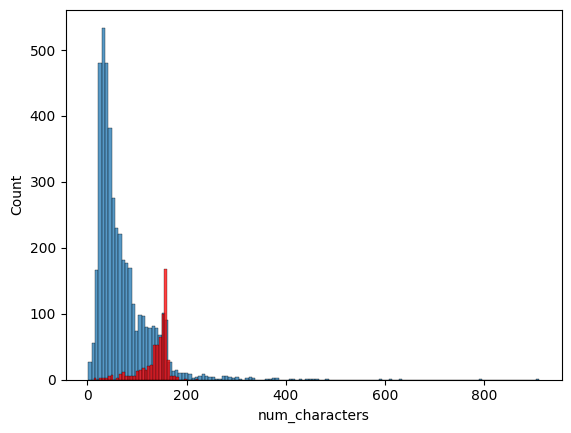

In [155]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: >

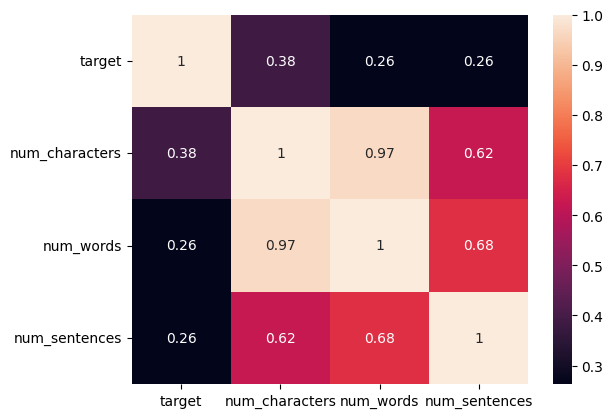

In [162]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

<Axes: xlabel='num_words', ylabel='Count'>

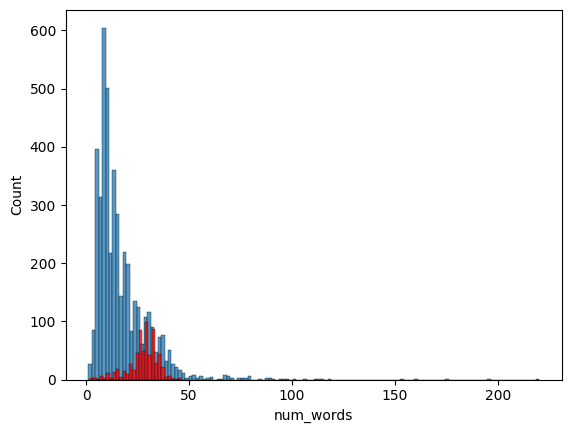

In [157]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

**3.Data Preprocessing:**


*  Lower case
*  Tokenization


*   Removing special characters
*   Removing stop words and Punctuation

*   Stemming








In [158]:
def text_transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]  #cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [159]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [160]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [164]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('singing')

'sing'

In [165]:
text_transform('Hi How are you?')

'hi'

In [166]:
df['transformed_text']=df['text'].apply(text_transform)

In [167]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [168]:
#wordcloud for apam msgs:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [169]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

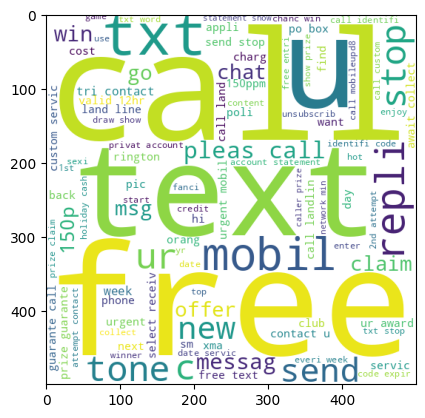

In [170]:
plt.imshow(spam_wc)

In [171]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

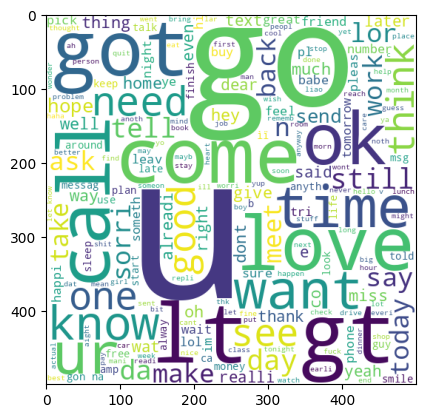

In [174]:
plt.imshow(ham_wc)

**Model Building**

In [176]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [177]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [178]:
X.shape

(5169, 3000)

In [179]:
Y=df['target'].values

In [180]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [183]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [184]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [185]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [186]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [187]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [188]:
# tfidf-->mnb

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [190]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [191]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [192]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(Y_test,y_pred)
  precision=precision_score(Y_test,y_pred)

  return accuracy,precision

In [193]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [194]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

  current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)

  print("For ",name)
  print("Accuracy = ",current_accuracy)
  print("Precision = ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy =  0.9758220502901354
Precision =  0.9747899159663865
For  KN
Accuracy =  0.9052224371373307
Precision =  1.0
For  NB
Accuracy =  0.9709864603481625
Precision =  1.0
For  DT
Accuracy =  0.9323017408123792
Precision =  0.8333333333333334
For  RF
Accuracy =  0.9738878143133463
Precision =  0.9826086956521739
For  AdaBoost
Accuracy =  0.9216634429400387
Precision =  0.8202247191011236
For  BgC
Accuracy =  0.9584139264990329
Precision =  0.8682170542635659
For  ETC
Accuracy =  0.9748549323017408
Precision =  0.9745762711864406
For  GBDT
Accuracy =  0.9506769825918762
Precision =  0.9306930693069307
For  xgb
Accuracy =  0.9680851063829787
Precision =  0.9487179487179487


In [195]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
9,xgb,0.968085,0.948718
8,GBDT,0.950677,0.930693
6,BgC,0.958414,0.868217
3,DT,0.932302,0.833333
5,AdaBoost,0.921663,0.820225


In [196]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,xgb,Accuracy,0.968085
6,GBDT,Accuracy,0.950677
7,BgC,Accuracy,0.958414
8,DT,Accuracy,0.932302
9,AdaBoost,Accuracy,0.921663


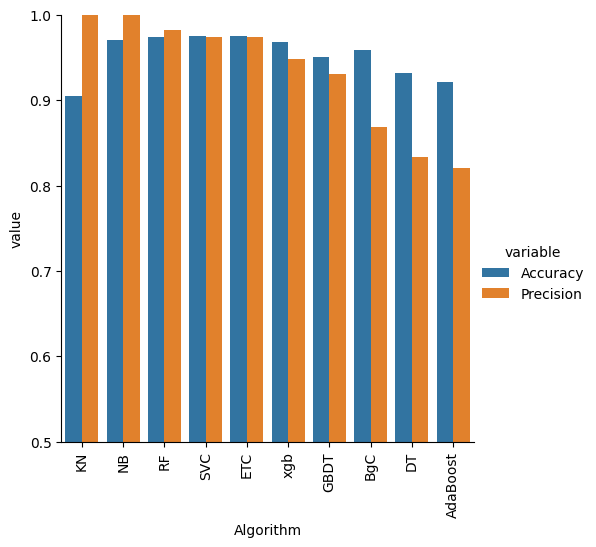

In [197]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Building a Predictive System**

In [198]:
input_mail=["Yes..gauti and sehwag out of odi series.,,,"]

#convert text to feature vectors
input_data_features=tfidf.transform(input_mail)

#making prediction
prediction=mnb.predict(input_data_features)
print(prediction)

if prediction[0]==1:
  print("Spam Mail")

else:
  print("Ham Mail")

[0]
Ham Mail
